In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
taxi = pd.read_csv('train.csv')
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [21]:
from datetime import datetime
from datetime import timedelta

In [22]:
def getDay(_date):
    return int(datetime.strptime(_date, '%Y-%m-%d %H:%M:%S').strftime('%Y%m'))

def getHour(_date):
    return int(datetime.strptime(_date, '%Y-%m-%d %H:%M:%S').strftime('%H'))

In [23]:
taxi['month'] = taxi['pickup_datetime'].apply(getDay)
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,201603
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,201606
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,201601
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,201604
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,201603


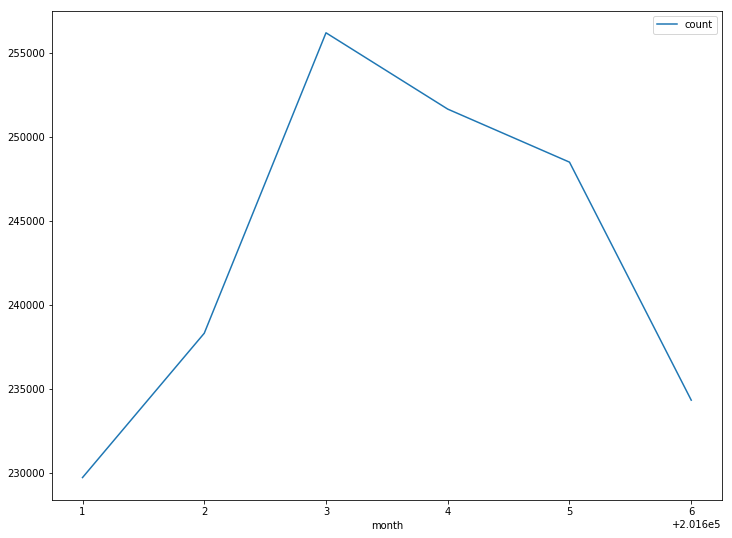

In [24]:
unstacked = taxi.groupby('month')[['id']].count()
unstacked.columns = ['count']
unstacked.reset_index()['month'].value_counts()
unstacked.plot()

In [25]:
taxi.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'month'],
      dtype='object')

In [26]:
grouped = taxi.groupby('passenger_count')['id'].count().reset_index()

Text(0.5, 1.0, 'Распределение по кол-ву пассажиров')

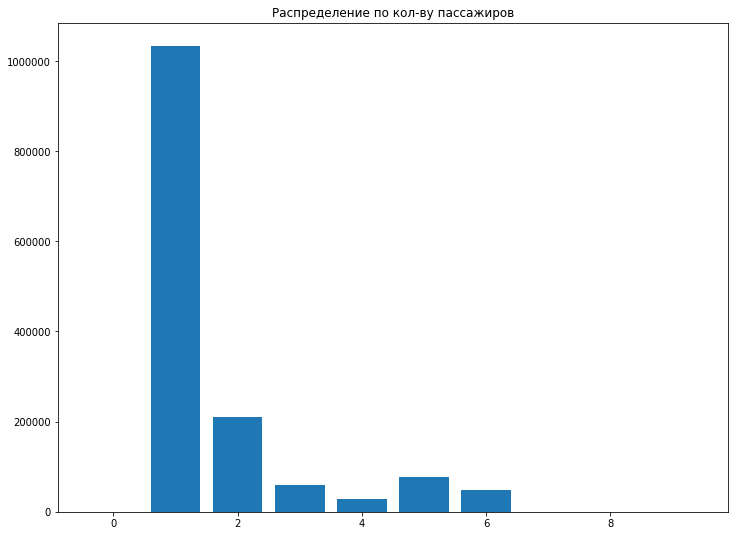

In [27]:
plt.bar(grouped['passenger_count'], grouped['id'])
plt.title('Распределение по кол-ву пассажиров')

In [28]:
grouped

,passenger_count,id
0,0,60
1,1,1033540
2,2,210318
3,3,59896
4,4,28404
5,5,78088
6,6,48333
7,7,3
8,8,1
9,9,1


Text(0.5, 1.0, 'Среднее время поездки в секундах в рамках месяца')

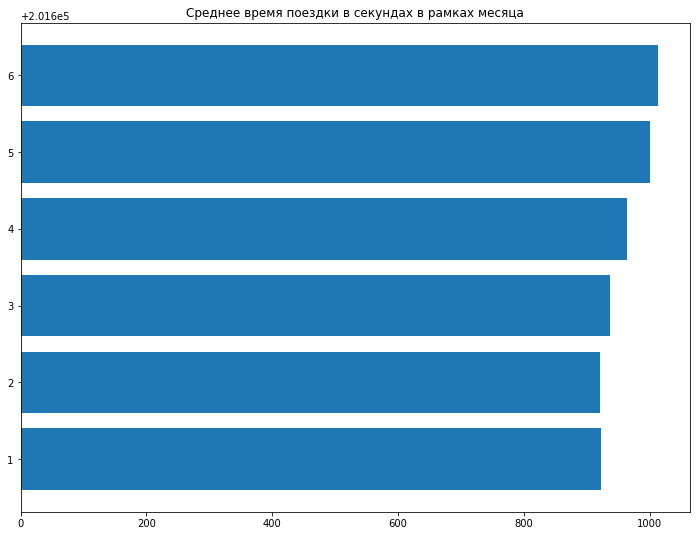

In [31]:
mtrip = taxi.groupby('month')['trip_duration'].mean()
mtrip = mtrip.reset_index('month')
plt.barh(mtrip['month'], mtrip['trip_duration'])
plt.title('Среднее время поездки в секундах в рамках месяца')

In [32]:
taxi['hour'] = taxi['pickup_datetime'].apply(getHour)
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,201603,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,201606,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,201601,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,201604,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,201603,13


In [33]:
grouped_by_hour = taxi.groupby('hour').count()['id']
grouped_by_hour.reset_index()

,hour,id
0,0,53248
1,1,38571
2,2,27972
3,3,20895
4,4,15792
5,5,15002
6,6,33248
7,7,55600
8,8,67053
9,9,67663


In [34]:
import seaborn as sns

/home/nik/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


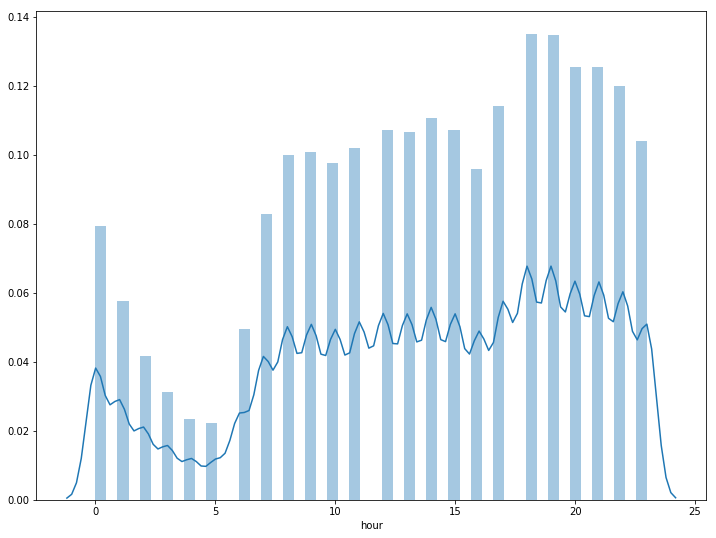

In [35]:
sns.distplot(taxi['hour'])

In [36]:
taxi_by_vendor = taxi.groupby(['vendor_id']).count()#.head(5)
taxi_by_vendor.head()

,id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,hour
vendor_id,,,,,,,,,,,,
1,678342,678342,678342,678342,678342,678342,678342,678342,678342,678342,678342,678342
2,780302,780302,780302,780302,780302,780302,780302,780302,780302,780302,780302,780302


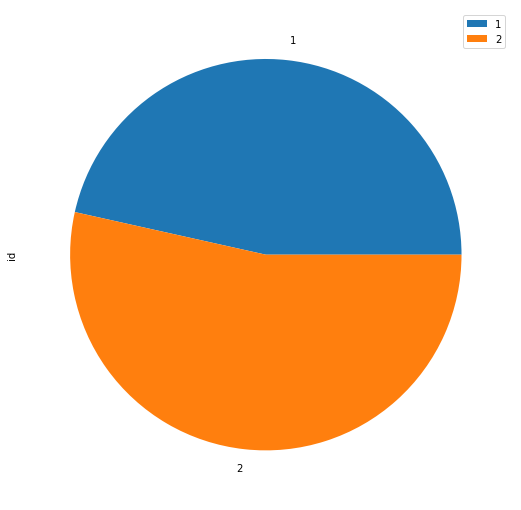

In [37]:
taxi_by_vendor.plot(kind='pie', y='id')